# <img src="https://wallpapercave.com/wp/wp3991167.jpg" width="1050" height="560" />
# Exploratory Data Analysis 

# 1. Problem Statement

Mr. Ram & Jindal from UP wants to form a new IPL team represeting UP. They would name the team as "Aयोध्या Warriors". So for upcoming IPL auction of 2021 their strategy is to poach maximum (8-9)number the best of players in their field of game from existing teams. As they want to promote cricket locally so they would give chance to 2-3 new comers from UP in team and some more numbers in full sqaud of team.

They have hired my services for exploratry data services and given me task of suggesting best bowlers(3-4), batsman(4-5) ,allrounders (2-3) also the super wicket keepers.

This notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 

# 2. Data Loading and Description


This is data of all IPL seasons happened till 2018. It is divided in two parts named  "Matches" & "Deliveries".
Matches dataset contains information on all matches in IPL seasons providing information upon playing teams, players, winning team, umpires & venue along with toss information.
Deliveries contains match statitics per ball thrown for different kind of run scored along with wickets. It also contains information on man of the match, dl rule and decisions of the matches.
Both the data sets can be combined using Match_DI to get complete information.

# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import random as rd
import pandas_profiling
from itertools import product,cycle, islice 
from fuzzywuzzy import fuzz
from matplotlib import pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import iplot, init_notebook_mode,download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25
# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)

D:\Python\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Importing DataSets

In [2]:
# Matches Data Set  "_O" suggest original copy of data
mdf_o =pd.read_csv('matches.csv',encoding='utf-8') 

In [3]:
# Matches Data Set  "_O" suggest original copy of data
ddf_o =pd.read_csv('deliveries.csv') # Matches Data Set  "_O" suggest original copy of data

# 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

# 3.1 Understanding the Dataset: Matches DataSet

In [4]:
mdf_o.shape         # This will print the number of rows and comlumns of the Data Frame
mdf_o.columns       # List of columns in Matches DataSet

(696, 18)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
mdf_o.head(5) #to see top 5 rows from the dataset

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
mdf_o.info()  # This will give Index, Datatype of each column, Null Values counts in each column and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               696 non-null    int64 
 1   season           696 non-null    int64 
 2   city             689 non-null    object
 3   date             696 non-null    object
 4   team1            696 non-null    object
 5   team2            696 non-null    object
 6   toss_winner      696 non-null    object
 7   toss_decision    696 non-null    object
 8   result           696 non-null    object
 9   dl_applied       696 non-null    int64 
 10  winner           693 non-null    object
 11  win_by_runs      696 non-null    int64 
 12  win_by_wickets   696 non-null    int64 
 13  player_of_match  693 non-null    object
 14  venue            696 non-null    object
 15  umpire1          695 non-null    object
 16  umpire2          695 non-null    object
 17  umpire3          60 non-null     ob

In [7]:
mdf_o.describe(include ='all') # It will give us more useful information on Statitics on each column of the dataset

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,696.000000,696.000000,689,696,696,696,696,696,696,696.000000,693,696.000000,696.000000,693,696,695,695,60
unique,NaN,NaN,32,498,14,14,14,2,3,NaN,14,NaN,NaN,214,35,55,58,18
top,NaN,NaN,Mumbai,11-04-2013,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,NaN,94,2,91,90,90,413,686,NaN,98,NaN,NaN,20,73,73,56,6
mean,974.103448,2012.965517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027299,NaN,13.472701,3.349138,NaN,NaN,NaN,NaN,NaN
std,2143.239623,3.069266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163070,NaN,23.607994,3.411398,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,174.750000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,348.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,522.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


# 3.2 Pre-profiling Matches Data Set

In [10]:
profile_m = mdf_o.profile_report(title ="Macthes dataset  preprofoling")
profile_m.to_file(output_file= 'Matches.html')

HTML file __"Macthes dataset preprofoling"__ is generated which is further looked into to more insights
for  munging,cleansing of Matches dataset.

# By performing all above steps we got the below insights in Matches dataset file.

# 3.3 Preprocessing Matches DataSet

In [8]:
# drpooing umpire1,umpire2 and umpire3 columns for DataFrame
mdf_o.drop(['umpire1','umpire2','umpire3'],axis =1,inplace =True)

In [9]:
# Converting date into datetime.
mdf_o['date']= pd.to_datetime(mdf_o['date'])

In [10]:
# we can see that Name of Venue of match does provide information about city so checking the Venue where City in Nan
mdf_o['venue'][mdf_o['city'].isnull()].unique()

array(['Dubai International Cricket Stadium'], dtype=object)

In [11]:
# We can see for all such records Venue is "Dubai International Cricket Stadium" so we will fill City as "Dubai"
mdf_o['city'][mdf_o['city'].isnull()]='Dubai'

D:\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
# COnverting field dl_applied to categorical data as 
mdf_o['dl_applied']= mdf_o['dl_applied'].astype(str)

In [13]:
# Cnnverting field Id to categorical data as 
mdf_o['id']= mdf_o['id'].astype(str)

In [14]:
# Converting season to Categorical data as its non-numerical
mdf_o['season']= mdf_o['season'].astype(str)

In [15]:
# To get Unique list of teams which played IPL matches
list(set((pd.concat([mdf_o['team2'],mdf_o['team1'],mdf_o['toss_winner'],mdf_o['winner']]))))

[nan,
 'Rajasthan Royals',
 'Chennai Super Kings',
 'Gujarat Lions',
 'Kochi Tuskers Kerala',
 'Delhi Daredevils',
 'Royal Challengers Bangalore',
 'Rising Pune Supergiants',
 'Deccan Chargers',
 'Pune Warriors',
 'Mumbai Indians',
 'Sunrisers Hyderabad',
 'Rising Pune Supergiant',
 'Kings XI Punjab',
 'Kolkata Knight Riders']

In [16]:
# Using above data a dictionary for Standardized names is prepared for data cleansing
uNames_dict= {'Delhi Daredevils':'Delhi Daredevils',
 'Royal Challengers Bangalore':'Royal Challengers Bangalore',
 'Sunrisers Hyderabad':'Sunrisers Hyderabad',
 'Mumbai Indians':'Mumbai Indians',
 'Gujarat Lions':'Gujarat Lions',
 'Chennai Super Kings':'Chennai Super Kings',
 'Kochi Tuskers Kerala':'Kochi Tuskers Kerala',
 'Kings XI Punjab':'Kings XI Punjab',
 'Kolkata Knight Riders':'Kolkata Knight Riders',
 'Rising Pune Supergiant':'Pune Warriors',
 'Rising Pune Supergiants':'Pune Warriors',
 'Rajasthan Royals':'Rajasthan Royals',
 'Deccan Chargers':'Sunrisers Hyderabad',
 'Pune Warriors':'Pune Warriors'}

In [17]:
# All the changes are performed on original DataFrame mdf_o
mdf_o['team1'][mdf_o['team1'].notnull()] = mdf_o['team1'][mdf_o['team1'].notnull()].map(lambda x: uNames_dict[x])
mdf_o['team2'][mdf_o['team2'].notnull()] = mdf_o['team2'][mdf_o['team2'].notnull()].map(lambda x: uNames_dict[x])
mdf_o['toss_winner'][mdf_o['toss_winner'].notnull()] = mdf_o['toss_winner'][mdf_o['toss_winner'].notnull()].map(lambda x: uNames_dict[x])
mdf_o['winner'][mdf_o['winner'].notnull()] = mdf_o['winner'][mdf_o['winner'].notnull()].map(lambda x: uNames_dict[x])

D:\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFra

# 3.4 Understanding the Dataset: Delivery DataSet

In [18]:
ddf_o.shape         # This will print the number of rows and comlumns of the Delivery Data Frame
ddf_o.columns       # List of columns in Delivery DataSet

(164750, 21)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [19]:
#to see top 5 rows from the dataset
ddf_o.head(5) 

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [20]:
# This will give Index, Datatype of each column, Null Values counts in each column and Memory information
ddf_o.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          164750 non-null  int64 
 1   inning            164750 non-null  int64 
 2   batting_team      164750 non-null  object
 3   bowling_team      164750 non-null  object
 4   over              164750 non-null  int64 
 5   ball              164750 non-null  int64 
 6   batsman           164750 non-null  object
 7   non_striker       164750 non-null  object
 8   bowler            164750 non-null  object
 9   is_super_over     164750 non-null  int64 
 10  wide_runs         164750 non-null  int64 
 11  bye_runs          164750 non-null  int64 
 12  legbye_runs       164750 non-null  int64 
 13  noball_runs       164750 non-null  int64 
 14  penalty_runs      164750 non-null  int64 
 15  batsman_runs      164750 non-null  int64 
 16  extra_runs        164750 non-null  int

In [21]:
# It will give us more useful information on Statitics on each column of the delivery dataset
ddf_o.describe(include ='all') 

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,164750.000000,164750.000000,164750,164750,164750.000000,164750.000000,164750,164750,164750,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,8157,8157,5918
unique,NaN,NaN,14,14,NaN,NaN,488,484,378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464,9,476
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,KD Karthik
freq,NaN,NaN,20673,20573,NaN,NaN,3879,3832,3182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146,4861,145
mean,977.951757,1.482307,NaN,NaN,10.151879,3.616243,NaN,NaN,NaN,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129,NaN,NaN,NaN
std,2147.671843,0.501592,NaN,NaN,5.675666,1.807398,NaN,NaN,NaN,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,175.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,349.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,521.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


# 3.5 Pre-profiling Deliveries Data Set

In [25]:
# HTML file "Deliveries_Prepfofiling" is generated which is further looked into to more insights for
# munging,cleansing of Matches dataset 
profile_m = ddf_o.profile_report(title ="Deliveries dataset  preprofoling")
profile_m.to_file(output_file='Deliveries_Prepfofiling.html')

# By performing all above steps we got the below insights in Deliveries dataset file.

# 3.6 Preprocessing Deliveries DataSet

In [22]:
# Changing types of field inning to categorical field
ddf_o['inning'] =ddf_o['inning'].astype('str')
ddf_o['match_id'] =ddf_o['match_id'].astype('str')
ddf_o['is_super_over']= ddf_o['is_super_over'].astype('str')

In [23]:
# Standardizing Name of the teams in all IPL seasons are performed on original DataFrame ddf_o
ddf_o['batting_team'][ddf_o['batting_team'].notnull()] = ddf_o['batting_team'][ddf_o['batting_team'].notnull()].map(lambda x: uNames_dict[x])
ddf_o['bowling_team'][ddf_o['bowling_team'].notnull()] = ddf_o['bowling_team'][ddf_o['bowling_team'].notnull()].map(lambda x: uNames_dict[x])

D:\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Merging both cleansed data sets: Matches & Deliveries 

In [24]:
# As we have cleansed both datasets seperately so it will be better to merge these datasets to see a complete picture.
# Both data sets are merged using Match_Id columns from both the datasets.
ipldf = pd.merge(ddf_o,mdf_o,left_on ='match_id',right_on='id',how='left').drop('id',axis=1)

In [25]:
# Adding one extra columns with integer value as 1 and naming the new columns as "Value"
# This columns will help us in analyzing various stats on wickets specially 
ipldf['Value']= 1

In [26]:
ipldf.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,...,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Value
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,...,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,...,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,...,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1


# 3.4 Post Pandas Profiling

In [27]:
profile = pandas_profiling.ProfileReport(ipldf)
profile.to_file(output_file="IPL.html")

In [27]:
ipldf.describe(include ='all')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,...,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Value
count,164750,164750,164750,164750,164750.000000,164750.000000,164750,164750,164750,164750,164750.000000,164750.000000,...,164750,164750,164750,164750,164750,164750,164429,164750.000000,164750.000000,164429,164750,164750.0
unique,696,4,11,11,NaN,NaN,488,484,378,2,NaN,NaN,...,11,11,11,2,3,2,11,NaN,NaN,214,35,NaN
top,126,1,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,0,NaN,NaN,...,Sunrisers Hyderabad,Kolkata Knight Riders,Mumbai Indians,field,normal,0,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,NaN
freq,267,85409,20673,20573,NaN,NaN,3879,3832,3182,164669,NaN,NaN,...,23345,21224,21577,97308,162601,161542,23634,NaN,NaN,4697,16872,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,10.151879,3.616243,NaN,NaN,NaN,NaN,0.037184,0.004898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.589663,3.254161,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,5.675666,1.807398,NaN,NaN,NaN,NaN,0.254087,0.115006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.381121,3.368754,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.0


In [28]:
# Defining a function which will caculated TOP players based upon certain fields, descending or ascending as asked.
def top(df,n=2,column='Value',Bool= True):    
    return df.sort_values(by=column,axis=0,ascending= Bool).iloc[-n:]

# 4. Questions

# 4.1 Who are the best wicket keeperss of all time in all IPL seasons? Also who are the top 5 wicket keepers in each season?

In [29]:
top_wk = ipldf[['season','bowling_team','fielder','Value']][(ipldf['dismissal_kind']== 'stumped')].groupby(['season','fielder','bowling_team']).sum()\
.reset_index().rename({'Value':'Stumping_Wickets'},axis=1)
top_wk

,season,fielder,bowling_team,Stumping_Wickets
0,2008,AC Gilchrist,Sunrisers Hyderabad,1
1,2008,KD Karthik,Delhi Daredevils,2
2,2008,Kamran Akmal,Rajasthan Royals,4
3,2008,MV Boucher,Royal Challengers Bangalore,1
4,2008,SP Goswami,Royal Challengers Bangalore,2
...,...,...,...,...
96,2018,KL Rahul,Kings XI Punjab,1
97,2018,MS Dhoni,Chennai Super Kings,3
98,2018,Q de Kock,Royal Challengers Bangalore,3
99,2018,RR Pant,Delhi Daredevils,2


In [30]:
best10_wk=top_wk.groupby('season')[['fielder','Stumping_Wickets','bowling_team']].apply(top,n=2,column='Stumping_Wickets')\
.reset_index().drop('level_1',axis=1)
data_best10_wk= [go.Scatter(x= best10_wk['season']+' : '+best10_wk['fielder'],
                y= best10_wk['Stumping_Wickets'],
                text=best10_wk['Stumping_Wickets'],textfont=dict(size=20,color ='black'),textposition='middle center',
                mode='markers+text',
                marker =dict(size=best10_wk['Stumping_Wickets']*6,
                color= best10_wk['Stumping_Wickets'],)
               )]
layout_best10_wk = go.Layout(title =dict(text ='Highest Number of Stumping by Wicket-Keepers in all IPL Season', 
                                         font = {'size': 20,'color':'black'}),
                             yaxis =dict(title_text = "Number of Stumpings",
                                         title_font = {'size': 20,'color':'black'})
                            )
fig_best10_wk = go.Figure(data=data_best10_wk,layout=layout_best10_wk)
fig_best10_wk.show()

Findings :  
            1. MS Dhoni, WP Saha & RV Uthappa are the most dependable wicket keeprers.
            2. RV Uthappa has done higher stumping more times
            3. Higest Stumping was done by Gilchrist.
            

In [32]:
best5_wk_season=top_wk.groupby('season')[['fielder','Stumping_Wickets','bowling_team']].apply(top,n=5,column='Stumping_Wickets')\
.reset_index().drop('level_1',axis=1).set_index('season')
@interact
def top5_wk_season(x=list(best5_wk_season.index.unique())):
    data_best5_wk_season= [go.Scatter(x= x+' : '+ best5_wk_season['fielder'].xs(x,axis=0),
                y= best5_wk_season['Stumping_Wickets'].xs(x,axis=0),
                text=best5_wk_season['bowling_team'].xs(x,axis=0),
                mode='markers',
                marker =dict(size=best5_wk_season['Stumping_Wickets'].xs(x,axis=0)*10,
                color= best5_wk_season['Stumping_Wickets'].xs(x,axis=0),
                symbol='star',
                line ={'width':2})
               )]
    layout_best5_wk_season =  go.Layout(title ='Highest wickets Stumped by Wicket-Keepers in {} IPL Season'.format(x))
    fig_best5_wk_season =go.Figure(data=data_best5_wk_season,layout=layout_best5_wk_season)
    fig_best5_wk_season.show()

interactive(children=(Dropdown(description='x', options=('2008', '2009', '2010', '2011', '2012', '2013', '2014…

Findings:Almost in every altername year below names have appeared in lsit of Top wicket Keeprs
        
        1.Karthik: 2008,2009,2010,2013,,2015,2016,2018
        2.Saha:    2018,2010,2014,2015,,2016,2017
        3.Dhoni:   2009,2010,2011,2013,2015,,2016,2017,2018
        4.Uthapa:  2011,2012,2014,2015,,2016,2017
        5.Gilcrist:2010,2011
        6.McCullum:2012

# 4.2 # Who are the best fielders of all IPL season & top 5 in each seasons?

In [33]:
top_fldr= ipldf[['season','bowling_team','fielder','Value']]\
[
 (ipldf['dismissal_kind']== 'run out') |
 (ipldf['dismissal_kind']== 'caught')  |
 (ipldf['dismissal_kind']== 'caught and bowled')
].\
groupby(['season','fielder','bowling_team']).sum().reset_index()
top_fldr

,season,fielder,bowling_team,Value
0,2008,A Chopra,Kolkata Knight Riders,2
1,2008,A Kumble,Royal Challengers Bangalore,3
2,2008,A Mukund,Chennai Super Kings,3
3,2008,A Nehra,Mumbai Indians,7
4,2008,A Symonds,Sunrisers Hyderabad,3
...,...,...,...,...
1466,2018,V Shankar,Delhi Daredevils,7
1467,2018,WP Saha,Sunrisers Hyderabad,6
1468,2018,YK Pathan,Sunrisers Hyderabad,4
1469,2018,YS Chahal,Royal Challengers Bangalore,2


In [34]:
best10_fldr=top_fldr.groupby('season')[['fielder','Value','bowling_team']].apply(top,n=2,column='Value')\
.reset_index().drop('level_1',axis=1)
data_best10_wk= [go.Scatter(x= best10_fldr['season'] + ' : '+best10_fldr['fielder'],
                y= best10_fldr['Value'],
                text=best10_fldr['Value'],
                mode='markers+text',textposition = 'top left',
                marker =dict(size=best10_fldr['Value']*2,
                color= best10_fldr['Value'],symbol='star')
               )]
layout_best10_fldr = go.Layout(title =dict(text ='Top fielders in all IPL Season', 
                                         font = {'size': 22,'color':'black','family':"Times New Roman"}),
                               yaxis =dict(title_text = 'Contribution in Wickets',
                                         title_font = {'size': 20,'color':'black'})
                            )
fig_best10_wk =go.Figure(data=data_best10_wk,layout=layout_best10_fldr)
fig_best10_wk.show()

    Findings:
            1.KD Karthik, NV Ojha, AB de Villiers, Dhoni are most consistent fielders in almost all IPL season.
            

In [35]:
best5_fldr_season=top_fldr.groupby('season')[['fielder','Value','bowling_team']].apply(top,n=5,column='Value')\
.reset_index().drop('level_1',axis=1).set_index('season')
@interact
def top5_fldr_season(x=list(best5_fldr_season.index.unique())):
    data_best5_fldr_season= [go.Scatter(x= x +' : '+ best5_fldr_season['fielder'].xs(x,axis=0),
                y= best5_fldr_season['Value'].xs(x,axis=0),
                text=best5_fldr_season['bowling_team'].xs(x,axis=0),
                mode='markers',
                marker =dict(size=best5_fldr_season['Value'].xs(x,axis=0)*5,
                color= best5_fldr_season['Value'].xs(x,axis=0),
                symbol='pentagon',
                line ={'width':4})
               )]
    layout_best5_fldr_season =  go.Layout(title ='Top 5 fielders in {} IPL Season'.format(x))
    fig_best5_wk_season =go.Figure(data=data_best5_fldr_season,layout=layout_best5_fldr_season)
    fig_best5_wk_season.show()

interactive(children=(Dropdown(description='x', options=('2008', '2009', '2010', '2011', '2012', '2013', '2014…

      Findings: Below list of players have featured maximum times in each year.
                  1. R Jadeja: 2008,2015,2018
                  2. KD Karthik: 2009,2015,2018
                  3. Girchirst: 2009,2010
                  4. Raina : 2008,2009,2010,2013,2014
                  5. de Villiers : 2009,2011,2016
                  6. DHoni: 2012,2013,2017,2018
                  7. NV Ojha: 2012,2016
                  
      

# 4.3 Who are the best bolwers of all time, also who are top 5 bowlers in each season?

In [38]:
# We need to get the count of runs conceded by bowler
ipldf['bowleruns_conceded'] = ipldf['wide_runs']+ipldf['noball_runs']+ipldf['batsman_runs']

In [39]:
bowlerover_matchid= ipldf.groupby(['season','match_id','bowler','bowling_team'])['over']\
.nunique().reset_index()
bowler_overdelivered =bowlerover_matchid.groupby(['season','bowler','bowling_team']).sum()
bowler_overdelivered

over
season bowler            bowling_team                     
2008   A Kumble          Royal Challengers Bangalore    39
       A Mishra          Delhi Daredevils               20
       A Nehra           Mumbai Indians                 45
       A Nel             Mumbai Indians                  3
       A Symonds         Sunrisers Hyderabad             7
...                                                    ...
2018   V Shankar         Delhi Daredevils                5
       Washington Sundar Royal Challengers Bangalore    20
       YK Pathan         Sunrisers Hyderabad             2
       YS Chahal         Royal Challengers Bangalore    50
       Yuvraj Singh      Kings XI Punjab                 2

[1237 rows x 1 columns]

In [40]:
# Total Runs conceded by bowler in each Season
bolwers_run_conceded=ipldf[['season','bowler','bowling_team','bowleruns_conceded']].groupby(['season', 'bowler','bowling_team'])\
.sum()
bolwers_run_conceded

bowleruns_conceded
season bowler            bowling_team                                   
2008   A Kumble          Royal Challengers Bangalore                 304
       A Mishra          Delhi Daredevils                            138
       A Nehra           Mumbai Indians                              348
       A Nel             Mumbai Indians                               31
       A Symonds         Sunrisers Hyderabad                         101
...                                                                  ...
2018   V Shankar         Delhi Daredevils                             62
       Washington Sundar Royal Challengers Bangalore                 200
       YK Pathan         Sunrisers Hyderabad                          14
       YS Chahal         Royal Challengers Bangalore                 391
       Yuvraj Singh      Kings XI Punjab                              24

[1237 rows x 1 columns]

In [41]:
# Total Wickets taken by bowler in each Season
bowler_wickets_matchid = ipldf[['season','bowler','bowling_team','Value']][(ipldf['dismissal_kind']== 'caught')|
                                                    (ipldf['dismissal_kind']== 'bowled')|
                                                       (ipldf['dismissal_kind']== 'lbw')|
                                          (ipldf['dismissal_kind']== 'caught and bowled')].groupby(['season','bowler','bowling_team'])\
.sum().rename({'Value':'Wickets_By_Bowler'},axis=1)
bowler_wicktes_taken= bowler_wickets_matchid.reset_index().groupby(['season','bowler','bowling_team']).sum()
bowler_wicktes_taken

Wickets_By_Bowler
season bowler            bowling_team                                  
2008   A Kumble          Royal Challengers Bangalore                  5
       A Mishra          Delhi Daredevils                             9
       A Nehra           Mumbai Indians                              12
       A Nel             Mumbai Indians                               1
       AA Noffke         Royal Challengers Bangalore                  1
...                                                                 ...
2018   UT Yadav          Royal Challengers Bangalore                 20
       V Shankar         Delhi Daredevils                             1
       Washington Sundar Royal Challengers Bangalore                  3
       YK Pathan         Sunrisers Hyderabad                          1
       YS Chahal         Royal Challengers Bangalore                 10

[1020 rows x 1 columns]

In [42]:
# To get number of maiden over thwron by each bowler in each season
runs_per_over=ipldf.\
groupby(['season','match_id','bowler','bowling_team','over'])['bowleruns_conceded'].sum().reset_index()
maiden_overs_count= pd.DataFrame(runs_per_over[runs_per_over['bowleruns_conceded'] ==0].groupby(['season','bowler','bowling_team'])['over']\
                                 .count()).rename({'over':'Maiden_Overs'},axis =1)
maiden_overs_count

Maiden_Overs
season bowler      bowling_team                             
2008   DJ Bravo    Mumbai Indians                          2
       GD McGrath  Delhi Daredevils                        2
       I Sharma    Kolkata Knight Riders                   1
       IK Pathan   Kings XI Punjab                         3
       M Ntini     Chennai Super Kings                     2
...                                                      ...
2018   Rashid Khan Sunrisers Hyderabad                     1
       SN Thakur   Chennai Super Kings                     1
       TA Boult    Delhi Daredevils                        1
       UT Yadav    Royal Challengers Bangalore             1
       YS Chahal   Royal Challengers Bangalore             1

[202 rows x 1 columns]

In [43]:
# Complete Stats of run conceded, wicktes taken & Over thrown & Maidedn overs in each IPL season
bowlers_stats =pd.merge(pd.merge(pd.merge(bowler_overdelivered,bolwers_run_conceded,left_index=True,right_index=True,how='left'),bowler_wicktes_taken,\
         left_index=True,right_index=True,how='left'),maiden_overs_count,left_index=True,right_index=True,how='left').reset_index()
bowlers_stats['Maiden_Overs'].fillna(0,inplace=True)
bowlers_stats['Wickets_By_Bowler'].fillna(0,inplace=True)
bowlers_stats['Wickets_By_Bowler']= bowlers_stats['Wickets_By_Bowler'].astype(int)
bowlers_stats['avg_run_per_over'] = bowlers_stats['bowleruns_conceded']/bowlers_stats['over']
# Printing Mean for different Stats so that we can use it filter down data
bowlers_stats[['over','bowleruns_conceded','Wickets_By_Bowler','Maiden_Overs','avg_run_per_over']].mean()

over                   21.604689
bowleruns_conceded    170.293452
Wickets_By_Bowler       5.708165
Maiden_Overs            0.216653
avg_run_per_over        8.572882
dtype: float64

In [44]:
top_10_bowlers = bowlers_stats[
             (bowlers_stats['over'] > 20) &
             (bowlers_stats['Wickets_By_Bowler'] > (5)) &
             (bowlers_stats['avg_run_per_over'] < (8)) &
             (bowlers_stats['Maiden_Overs'] > (0.21))
             ].groupby(['season']).apply(top,column = 'Wickets_By_Bowler',n=1)
top_10_bowlers

,,season,bowler,bowling_team,over,bowleruns_conceded,Wickets_By_Bowler,Maiden_Overs,avg_run_per_over
season,,,,,,,,,
2008,79,2008,SR Watson,Rajasthan Royals,55,383,17,1.0,6.963636
2009,174,2009,RP Singh,Sunrisers Hyderabad,61,417,23,1.0,6.836066
2010,332,2010,Z Khan,Mumbai Indians,49,376,15,1.0,7.673469
2011,447,2011,SL Malinga,Mumbai Indians,64,375,28,2.0,5.859375
2012,537,2012,M Morkel,Delhi Daredevils,63,453,25,1.0,7.190476
2013,629,2013,DJ Bravo,Chennai Super Kings,63,497,32,1.0,7.888889
2014,792,2014,R Ashwin,Chennai Super Kings,60,437,16,1.0,7.283333
2015,848,2015,DJ Bravo,Chennai Super Kings,54,426,26,1.0,7.888889
2016,939,2016,B Kumar,Sunrisers Hyderabad,66,490,23,3.0,7.424242


In [45]:
top_10_bowlers =bowlers_stats[
             (bowlers_stats['over'] > 20) &
             (bowlers_stats['Wickets_By_Bowler'] > (5)) &
             (bowlers_stats['avg_run_per_over'] < (8)) &
             (bowlers_stats['Maiden_Overs'] > (0.21))
             ].groupby(['season']).apply(top,column = 'Wickets_By_Bowler',n=1)
trace_runs =  go.Scatter(
                   x=  top_10_bowlers['season']+ ' : '+top_10_bowlers['bowler'],
                   y = top_10_bowlers['bowleruns_conceded'],hovertext=top_10_bowlers['bowler'],
                   text=top_10_bowlers['bowleruns_conceded'].astype(int),
                   textposition = 'top left',
                   mode ='lines+markers+text', name ='Runs_By_bowler',
                   marker =dict(size=top_10_bowlers['over']*0.6,
                                 color=top_10_bowlers['over'],
                                 symbol='diamond-dot',
                                 line ={'width':2}))

trace_wickets =  go.Scatter(
                   x=  top_10_bowlers['season']+ ' : '+top_10_bowlers['bowler'],
                   y = top_10_bowlers['Wickets_By_Bowler']*3,hovertext=top_10_bowlers['bowler'],
                   text=top_10_bowlers['Wickets_By_Bowler'].astype(int),
                   textposition = 'top left',
                   mode ='text+markers', name ='Wickets_By_bowler',
                   marker =dict(size=top_10_bowlers['over'],
                                 color=top_10_bowlers['over'],
                                 symbol='pentagon',
                                 line ={'width':2,'color':'red'}))
trace_Maiden_Overs =  go.Scatter(
                   x=  top_10_bowlers['season']+ ' : '+top_10_bowlers['bowler'],
                   y = top_10_bowlers['Maiden_Overs'],hovertext=top_10_bowlers['bowler'],
                   text=top_10_bowlers['Maiden_Overs'].astype(int),
                   textposition = 'bottom right',
                   mode ='lines+markers+text', name ='MaidenOver_By_bowler',
                   marker =dict(size=top_10_bowlers['over']*0.6,
                                 color=top_10_bowlers['over'],
                                 symbol='star',
                                 line ={'width':2,'color':'blue'}))
trace_avg_runs =  go.Scatter(
                   x=  top_10_bowlers['season']+ ' : '+top_10_bowlers['bowler'],hovertext=top_10_bowlers['bowler'],
                   y = top_10_bowlers['avg_run_per_over']*35,
                   text=top_10_bowlers['avg_run_per_over'].astype(int),
                   textposition = 'middle center',
                   mode ='markers+text', name ='AvgRuns_By_bowler',
                   marker =dict(size=top_10_bowlers['over']*0.3,
                                 color=top_10_bowlers['over'],
                                 symbol='circle',
                                 line ={'width':2,'color':'black'}))
data_10_bowlers =[trace_runs,trace_wickets,trace_Maiden_Overs,trace_avg_runs]

layout_10_bowlers = go.Layout(title =dict(text ='Top 10 bolwers stats of all Season', 
                                         font = {'size': 20,'color':'black'}),
                             yaxis =dict(title_text = "Various Statitics of Bowlers",
                                         title_font = {'size': 20,'color':'black'}))
fig_10_bowlers = go.Figure(data=data_10_bowlers,layout =layout_10_bowlers)
fig_10_bowlers.show()

       Findings: 
           1. DJ Bravo & B Kumar have been in list of best bowlers as per stats twice. 
           2. Also Rashid Khan's number of wickets & maiden over counts been maximum in 2018 IPL
           3. B Kumar & Z Khan has been evry econimical.
           4. Rashid Khan & B Kumar has taken maximum wickets

In [48]:
# Top wicket taking bowlers in each IPL Season
best5_wicket_taker =bowlers_stats.groupby('season')[['bowler','Wickets_By_Bowler','bowling_team']].\
apply(top,column='Wickets_By_Bowler',n= 5).reset_index().drop('level_1',axis=1).set_index('season')
@interact
def top5_wicket_taker(x= list(best5_wicket_taker.index.unique())):
    data_best5_wicket_taker= [go.Scatter(x= x+' : '+best5_wicket_taker['bowler'].xs(x,axis=0),
                y= best5_wicket_taker['Wickets_By_Bowler'].xs(x,axis=0),
                mode='markers',
                marker =dict(size=best5_wicket_taker['Wickets_By_Bowler'].xs(x,axis=0)*3,
                color= best5_wicket_taker['Wickets_By_Bowler'].xs(x,axis=0),
                symbol='triangle-up-open',
                line ={'width':4})
               )]
    layout_best5_fldr_season =  go.Layout(title ='Top 5 Wicket Taking Bowlers in {} IPL'.format(x))
    fig_best5_wicket_taker =go.Figure(data=data_best5_wicket_taker,layout=layout_best5_fldr_season)
    fig_best5_wicket_taker.show()

interactive(children=(Dropdown(description='x', options=('2008', '2009', '2010', '2011', '2012', '2013', '2014…

    Findings: Listing bowlers who apeared appearing in maximum number of Season.
                1. Malinga: 2009,2010,2011,2012,2015
                2. IK Pathan: 2009,2010
                3. A Mishra: 2010,2011
                4. DJ Bravo: 2013,2015
                5. B Kumar: 2014,2016,2017
                6. AJ Tye, Unadkat, Watson, Bumbra, H Panday(Once in last 3 seasons)
        

# 4.4 Who are the best batsman of all time and also in each season?

In [49]:
# Total_Matches Played
total_matches  = ipldf[['match_id','batsman','season']].drop_duplicates().groupby(['season','batsman']).count().reset_index().rename({'match_id':'matches_played'},axis=1)
total_matches

,season,batsman,matches_played
0,2008,A Chopra,5
1,2008,A Kumble,4
2,2008,A Mishra,3
3,2008,A Mukund,1
4,2008,A Nehra,3
...,...,...,...
1664,2018,WP Saha,10
1665,2018,Washington Sundar,5
1666,2018,YK Pathan,13
1667,2018,YS Chahal,1


In [50]:
# Total Runs Scored
total_runs =  ipldf.groupby(['season','batsman'])[['batsman_runs']].sum().reset_index()
total_runs

,season,batsman,batsman_runs
0,2008,A Chopra,42
1,2008,A Kumble,13
2,2008,A Mishra,37
3,2008,A Mukund,0
4,2008,A Nehra,3
...,...,...,...
1664,2018,WP Saha,130
1665,2018,Washington Sundar,68
1666,2018,YK Pathan,276
1667,2018,YS Chahal,1


In [51]:
# Calculating Strike Rate
plr_runs_balls =ipldf.groupby(['season','match_id','batsman'])[['ball','batsman_runs']].agg({'ball':'count','batsman_runs':sum}).reset_index()
plr_runs_balls['strike_rate']=plr_runs_balls['batsman_runs']*100/(plr_runs_balls['ball'])
strikrate= plr_runs_balls.groupby(['season','batsman']).agg({'ball':sum,'batsman_runs':sum,'strike_rate':'mean'})
strikrate

ball  batsman_runs  strike_rate
season batsman                                           
2008   A Chopra             55            42    59.977778
       A Kumble             17            13    85.714286
       A Mishra             42            37    72.291667
       A Mukund              1             0     0.000000
       A Nehra              13             3    23.333333
...                        ...           ...          ...
2018   WP Saha             108           130   109.416667
       Washington Sundar    40            68   171.904762
       YK Pathan           211           276   128.155008
       YS Chahal             4             1    25.000000
       Yuvraj Singh         74            66    90.124092

[1669 rows x 3 columns]

In [52]:
# Counting Fours DataFrame
fours = ipldf[['season','batsman','batsman_runs']]\
                    [
                    (ipldf['batsman_runs']>=4) &
                    (ipldf['batsman_runs']<6) 
                    ].groupby(['season','batsman']).count().reset_index().rename({'batsman_runs':'num_of_fours'},axis=1)
# Counting sixes DataFrame
sixes = ipldf[['season','batsman','batsman_runs']][ipldf['batsman_runs']>=6].groupby(['season','batsman']).\
count().reset_index().rename({'batsman_runs':'num_of_sixes'},axis=1)

In [53]:
# Full Stats of batsman
batsman_stats= pd.merge(pd.merge
                       (pd.merge
                       (pd.merge
                       (total_matches,total_runs, left_on =['season','batsman'],right_on=['season','batsman'],how ='left'),
                       fours,left_on =['season','batsman'],right_on=['season','batsman'],how ='left'),
                       sixes,left_on =['season','batsman'],right_on=['season','batsman'],how ='left'),
                       strikrate,left_on =['season','batsman'],right_on=['season','batsman'],how ='left')\
                       .set_index('season').drop('batsman_runs_x',axis=1).rename({'batsman_runs_y':'batsman_runs'},axis=1)

batsman_stats['avg_per_match'] = batsman_stats['batsman_runs']/batsman_stats['matches_played']


batsman_stats[['batsman_runs','num_of_fours','num_of_sixes','avg_per_match','strike_rate']].mean()

batsman_runs     122.130018
num_of_fours      14.978452
num_of_sixes       7.257115
avg_per_match     13.740251
strike_rate       96.359469
dtype: float64

In [54]:
best_batsman = batsman_stats[(batsman_stats['batsman_runs']>(122*2.5)) &
                            (batsman_stats['num_of_fours']>(14)) &
                            (batsman_stats['num_of_sixes']>(7)) &
                            (batsman_stats['avg_per_match']>(13)) &
                            (batsman_stats['strike_rate']>(96*1.24))    
                            ]
@interact
def top_batsman(x= list(best_batsman.index.unique())):
    trace_runs =   go.Scatter(
                   x=  x+' : '+ best_batsman['batsman'].xs(x,axis=0),
                   y = best_batsman['batsman_runs'].xs(x,axis=0),hovertext=best_batsman['batsman_runs'].xs(x,axis=0),
                   mode ='markers+lines', name ='Batsman_Runs',
                   line={'dash': 'solid'},
                   marker =dict(size=best_batsman['batsman_runs'].xs(x,axis=0)/20,
                                 color=best_batsman['batsman_runs'].xs(x,axis=0),
                                 symbol='diamond-dot',
                                 line ={'width':2,'color':'green'})) 
    trace_sixes =  go.Scatter(
                   x= x+' : '+ best_batsman['batsman'].xs(x,axis=0),
                   y = best_batsman['num_of_sixes'].xs(x,axis=0),hovertext=best_batsman['num_of_sixes'].xs(x,axis=0),
                   mode ='markers+lines', name ='Number of Sixes',
                   line={'dash': 'dash'},
                   marker =dict(size=best_batsman['num_of_sixes'].xs(x,axis=0),
                                 color=best_batsman['num_of_sixes'].xs(x,axis=0),
                                 symbol='triangle-up-open',
                                 line ={'width':2,'color':'red'})) 
    trace_fours =  go.Scatter(
                   x=  x+' : '+best_batsman['batsman'].xs(x,axis=0),
                   y = best_batsman['num_of_fours'].xs(x,axis=0),hovertext=best_batsman['num_of_fours'].xs(x,axis=0),
                   mode ='markers+lines', name ='Number of Fours',
                   marker =dict(size=best_batsman['num_of_fours'].xs(x,axis=0),
                                 color=best_batsman['num_of_fours'].xs(x,axis=0),
                                 symbol='circle',
                                 line ={'width':2,'color':'red'}))
    trace_avg_match =  go.Scatter(
                   x= x+' : '+ best_batsman['batsman'].xs(x,axis=0),
                   y = best_batsman['avg_per_match'].xs(x,axis=0)*4,hovertext=best_batsman['avg_per_match'].xs(x,axis=0),
                   mode ='markers+lines', name ='Avg_per_match',
                   line={'dash': 'dash'},
                   marker =dict(size=best_batsman['avg_per_match'].xs(x,axis=0),
                                 color=best_batsman['avg_per_match'].xs(x,axis=0),
                                 symbol='star',
                                 line ={'width':2,'color':'white'}))
    
    data_best_batsman   =   [trace_runs,trace_sixes,trace_fours,trace_avg_match]
    layout_best_batsman =  go.Layout(title ='Stats of Top Batsman of in {} IPL Season'.format(x))
    fig_best_batsman    =  go.Figure(data=data_best_batsman,layout=layout_best_batsman)
    fig_best_batsman.show()


interactive(children=(Dropdown(description='x', options=('2008', '2009', '2010', '2011', '2012', '2013', '2014…

    Findings: List of Players who appeared maximum number of times in top batsman each IP season.
         1.de Villiers : 2013,2012,2014,,2015,2016,,2018
         2.Dhoni;2008,2011,2014,,2018
         3.Raina:2008,2009,2010,,2014,2017
         4.V Kohli: 2010,2013,2015,2016,2018
         5.SR Watson; 2011,2008,2013,2015,,2018
         6.Gayle: 2011,2012,2013,2015,,2018       
         7.DA warner:2014,2015,2016,2017
         8.KL Rahul: 2014,2016,,2018


In [55]:
# Plotting highest run scorers of each season
top_rungetters= ipldf.groupby(['season','batsman'])[['batsman_runs']].sum().reset_index()
top_10_rungetters = top_rungetters.groupby('season')[['batsman','batsman_runs']].apply(top,n=1,column='batsman_runs').\
reset_index().drop('level_1',axis=1)
data_top_10_rungetters = [go.Bar(x= top_10_rungetters['season']+' : '+top_10_rungetters['batsman'],
                y= top_10_rungetters['batsman_runs'],
                text=top_10_rungetters['batsman_runs'], opacity=.8,width=.5,
                textposition= 'auto',
                marker =dict(color = top_10_rungetters['batsman_runs'] )
                 )]
layout_top_10_rungetters = go.Layout(title =dict(text ='Top 10 run getters in all IPL Season', 
                                         font = {'size': 20,'color':'black'}),
                             yaxis =dict(title_text = "Run Scored",
                                         title_font = {'size': 20,'color':'black'})
                            )
fig_top_10_rungetters =go.Figure(data=data_top_10_rungetters,layout=layout_top_10_rungetters)
fig_top_10_rungetters.show()

       Finding:  
               1. CH Gayle appeared twice in list of maximum runs in each IPL season.
               2. V kohli highest score in all IPL seasons till now.               

In [56]:
# Dependable hitter who can change matches with high strinke rate and higher runs ine ach season
top_hitters= batsman_stats[(batsman_stats['batsman_runs']>(122*2)) &
                            (batsman_stats['num_of_fours']>(14)) &
                            (batsman_stats['num_of_sixes']>(7)) &
                            (batsman_stats['avg_per_match']>(13*3)) &
                            (batsman_stats['strike_rate']>(96*1.4))    
                            ].reset_index()
trace0 = go.Bar(x=top_hitters['season'] +' : '+ top_hitters['batsman'],
                y= top_hitters['batsman_runs'],
                text=top_hitters['batsman_runs'],
                textposition= 'auto',
                name ='Batsman_Runs',
                marker =dict(color='yellow'))
trace1 = go.Bar(x=top_hitters['season'] +' : '+ top_hitters['batsman'],
                y= top_hitters['strike_rate']*4,
                text=top_hitters['strike_rate'].astype(int),
                textposition= 'auto',
                name ='Strike_Rate',
                marker =dict(color='seagreen'))
trace2 = go.Bar(x=top_hitters['season'] +' : '+ top_hitters['batsman'],
                y= top_hitters['avg_per_match']*40,
                text=top_hitters['avg_per_match'].astype(int),
                textposition= 'auto',textfont =dict(size=1000),
                name ='Avg_Per_Match',
                marker =dict(color='orange'))
trace3 = go.Bar(x=top_hitters['season'] +' : '+ top_hitters['batsman'],
                y= top_hitters['num_of_sixes']*50,
                text=top_hitters['num_of_sixes'],textfont =dict(size=1000),
                textposition= 'auto',
                name ='Num_Of_Sixes',
                marker =dict(color='darkviolet'))
trace4 = go.Bar(x=top_hitters['season'] +' : '+ top_hitters['batsman'],
                y= top_hitters['num_of_fours']*30,
                text=top_hitters['num_of_fours'],
                textposition= 'auto',
                name ='Num_Of_Fours',
                marker =dict(color='aqua'))
data_top_hitter =[trace3,trace2,trace4,trace1,trace0]
layout_top_hitters = go.Layout(title =dict(text ='Top 10 run hitter(strike rate) in all IPL Season', 
                                         font = {'size': 20,'color':'black'}),
                             yaxis =dict(title_text = "Various Stats for Hitter",
                                         title_font = {'size': 20,'color':'black'}),barmode='stack'
                            )
fig_top_hitters =go.Figure(data=data_top_hitter,layout=layout_top_hitters)
fig_top_hitters.show()

    Finding: 
          1. Rishabh Pant, Gayle & CA Lyn have very higher strike rates and can score good scores for team in less bowls.
          2. KS Williamson & DH Gayle are very dependable hitters for long inning with good strike rate.
          3. KL Rahul & DA Warner also plays longer with better strike rate.

# 4.5 Who won Player of the Match title maximum number of times in all seasons ?

In [53]:
plr_of_match= mdf_o[mdf_o['player_of_match'].notnull()].groupby(['season','player_of_match'])[['player_of_match']].count().\
rename({'player_of_match':'NumTimes_PlyrOfMatch'},axis=1).reset_index()
plr_of_match

,season,player_of_match,NumTimes_PlyrOfMatch
0,2008,A Kumble,1
1,2008,A Mishra,1
2,2008,A Nehra,1
3,2008,AC Gilchrist,2
4,2008,BB McCullum,1
...,...,...,...
468,2018,SS Iyer,1
469,2018,SV Samson,2
470,2018,SW Billings,1
471,2018,TG Southee,1


In [55]:
PlyrofMatch= plr_of_match.groupby(['season']).apply(top,n=1,column='NumTimes_PlyrOfMatch').\
drop(['season'],axis=1).reset_index().drop('level_1',axis=1)
data_PlyrofMatch = [go.Bar(x= PlyrofMatch['season']+' : '+PlyrofMatch['player_of_match'],
                y= PlyrofMatch['NumTimes_PlyrOfMatch'],
                text=PlyrofMatch['NumTimes_PlyrOfMatch'], opacity=.8,width=.5,
                textposition= 'auto',
                marker =dict(color = PlyrofMatch['NumTimes_PlyrOfMatch'] )
                 )]
layout_PlyrofMatch = go.Layout(title ='Winning "Player of the Match" titles maximum times in IPL Seasons')
fig_PlyrofMatch =go.Figure(data=data_PlyrofMatch,layout=layout_PlyrofMatch)
fig_PlyrofMatch.show()

    Findings:
        1.We can see Rashid Khan in top bolwers list as well and is a player who won man of matches maximum times in 2018.
        2. Gayle, Warner, kolhi ,Hussey have been mostly won the title maximum number of times.

# 4.6 Who are the best alrounders in all IP season & also in each IPL Season

In [55]:
# Merging all kind of stats calculated till now to get allrounder stats
bat_stats =batsman_stats.reset_index()
allrounder_df =pd.merge(pd.merge(bowlers_stats,top_fldr,left_on=['season','bowler'],right_on =['season','fielder'],how='inner'),
         bat_stats,left_on=['season','bowler'],right_on =['season','batsman'],how='inner')\
.drop(['bowling_team_x','fielder','bowling_team_y','batsman'],axis=1).rename(
{'bowler':'player','Value':'fielder_wickets','ball':'balls_faced'},axis=1)  
allrounder_df.mean()

season                       inf
over                   25.969084
bowleruns_conceded    202.354340
Wickets_By_Bowler       6.904875
Maiden_Overs            0.268728
avg_run_per_over        8.336591
fielder_wickets         3.514863
matches_played          6.214031
num_of_fours           11.970968
num_of_sixes            7.205128
balls_faced            84.068966
batsman_runs          104.637337
strike_rate            98.259035
avg_per_match          11.788758
dtype: float64

In [56]:
# Getting the top allrounders of all IPL seasons.
top_allrounders = allrounder_df[
    (allrounder_df['over']>allrounder_df['over'].mean()) &
    (allrounder_df['bowleruns_conceded']>allrounder_df['bowleruns_conceded'].mean()) &
    (allrounder_df['Wickets_By_Bowler']>allrounder_df['Wickets_By_Bowler'].mean()) &
    (allrounder_df['avg_run_per_over']>allrounder_df['avg_run_per_over'].mean()) &
    (allrounder_df['fielder_wickets']>allrounder_df['fielder_wickets'].mean()) &
    (allrounder_df['num_of_fours']>allrounder_df['num_of_fours'].mean()) &
    (allrounder_df['balls_faced']>allrounder_df['balls_faced'].mean()) &
    (allrounder_df['batsman_runs']>allrounder_df['batsman_runs'].mean()) &
    (allrounder_df['strike_rate']>allrounder_df['strike_rate'].mean()) &
    (allrounder_df['avg_per_match']>allrounder_df['avg_per_match'].mean()) 
]
top_allrounders

,season,player,over,bowleruns_conceded,Wickets_By_Bowler,Maiden_Overs,avg_run_per_over,fielder_wickets,matches_played,num_of_fours,num_of_sixes,balls_faced,batsman_runs,strike_rate,avg_per_match
183,2010,IK Pathan,48,426,15,0.0,8.875000,4,13,21.0,10.0,188,276,161.031152,21.230769
187,2010,JH Kallis,57,476,13,1.0,8.350877,7,16,68.0,9.0,517,572,98.626527,35.750000
462,2013,KA Pollard,31,292,10,0.0,9.419355,11,18,27.0,29.0,290,420,138.494822,23.333333
575,2015,AR Patel,47,392,11,0.0,8.340426,8,12,13.0,8.0,181,206,107.717872,17.166667
602,2015,JP Faulkner,45,426,8,1.0,9.466667,4,11,12.0,5.0,116,144,114.531040,13.090909
692,2016,SR Watson,57,485,20,0.0,8.508772,10,15,14.0,12.0,135,179,103.162179,11.933333
770,2018,AD Russell,38,372,13,0.0,9.789474,8,14,17.0,31.0,179,326,149.263656,23.285714
778,2018,BA Stokes,37,317,8,1.0,8.567568,6,12,13.0,6.0,166,203,108.243862,16.916667
792,2018,HH Pandya,43,405,18,0.0,9.418605,11,13,22.0,11.0,205,279,148.272617,21.461538


In [372]:
trace0 = go.Bar(x=top_allrounders['season'] +' : '+ top_allrounders['player'],
                y= top_allrounders['Wickets_By_Bowler']*40 ,
                text=top_allrounders['Wickets_By_Bowler'],
                textposition= 'auto',
                name ='Wickets_By_Bowler',
                marker =dict(color='aqua'))
trace1 = go.Bar(x=top_allrounders['season'] +' : '+ top_allrounders['player'],
                y= top_allrounders['avg_run_per_over']*30 ,
                text=top_allrounders['avg_run_per_over'].astype(int),
                textposition= 'outside',textfont =dict(size=100),
                name ='Bowler_Avg_run_per_over',
                marker =dict(color='royalblue'))# orientation ='h' will chart horizontal bars
trace2 = go.Bar(x=top_allrounders['season'] +' : '+ top_allrounders['player'],
                y= top_allrounders['fielder_wickets'] *70,
                text=top_allrounders['fielder_wickets'],
                textposition= 'auto',
                name ='Fielder_wickets',
                marker =dict(color='seagreen'))
trace3 = go.Bar(x=top_allrounders['season'] +' : '+ top_allrounders['player'],
                y= top_allrounders['batsman_runs'],
                text=top_allrounders['batsman_runs'],
                textposition= 'auto',                
                name ='Batsman_runs',
                marker =dict(color='yellow'))
trace4 = go.Bar(x=top_allrounders['season'] +' : '+ top_allrounders['player'],
                y= top_allrounders['strike_rate']*5,
                text=top_allrounders['strike_rate'].astype(int),
                textposition= 'auto',  
                name ='Strike_rate',
                marker =dict(color='orange'))
trace5 = go.Bar(x=top_allrounders['season'] +' : '+ top_allrounders['player'],
                y= top_allrounders['avg_per_match']*30,
                text=top_allrounders['avg_per_match'].astype(int),
                textposition= 'auto',
                name ='Batsman_Avg_per_match',
                marker =dict(color='skyblue'))
data_allrounder =[trace1,trace0,trace2,trace5,trace4,trace3]
layout_allrounder = go.Layout(title =dict(text ='Best All Rounders of all IPL Seasons', 
                                         font = {'size': 20,'color':'black'}),
                             yaxis =dict(title_text = 'Various Stats for Allrounders',
                                         title_font = {'size': 20,'color':'black'}),barmode='stack'
                            )
fig4   =  go.Figure(data=data_allrounder,layout =layout_allrounder)
fig4.show()

    Findings:
        1. HH Panday, SR Watson , KA Pollard & JH Kallis have higher Average Runs  per match & Strike Rates
        2. Hardik, Watson & Pollard have contributed in wicket falls maximum times.
        3. Pandya, Watson & Pathan have taken more wickets as a bowler as well.
        4. Pathan , Faulkner & Stokes were very economical bowlers as well.


# 4.7 Establishing Correlation between different stats in data for winning percentage.

In [58]:
df1= ipldf[['season','match_id','inning','batting_team','bowling_team','winner','batsman','batsman_runs']].groupby(['season','match_id','inning','batting_team','bowling_team','winner','batsman']).sum().reset_index()
df2= ipldf[['season','match_id','inning','bowler','Value']][ipldf['player_dismissed'].notnull()].groupby(['season','match_id','inning','bowler']).count()\
.reset_index()
df3=mdf_o[['id','win_by_runs','win_by_wickets','player_of_match','city']]
stats = pd.merge(pd.merge(df1,df2,left_on=['season','match_id','inning'],right_on=['season','match_id','inning'],how='left'),df3,
         left_on=['match_id'],right_on=['id'],how='left')
stats['Value']=stats['Value'].fillna(0).astype(int)
totalRunsMatchID = ipldf[['match_id','inning','total_runs']].groupby(['match_id','inning']).sum()
totalWicketsMatchID = ipldf[['match_id','inning','Value']][ipldf['player_dismissed'].notnull()].groupby(['match_id','inning']).sum()
Wickets_Runs_MatchID = pd.merge(totalRunsMatchID,totalWicketsMatchID,left_index =True,right_index =True,how='left').reset_index()
heatmap_df =pd.merge(stats,Wickets_Runs_MatchID,left_on=['match_id','inning'],right_on=['match_id','inning'],how='left').rename({
    'Value_y':'total_Wickets','Value_x':'bowler_Wickets'
},axis =1)
heatmap_df['run_pct']= heatmap_df['batsman_runs']*100/heatmap_df['total_runs']
heatmap_df['wicket_pcr']= heatmap_df['bowler_Wickets']*100/heatmap_df['total_Wickets']
heatmap_df['winnerIsbowingTeam'] = (heatmap_df['winner'] == heatmap_df['bowling_team'] ).astype(int)
heatmap_df['winnerIsbattingTeam'] = (heatmap_df['winner'] == heatmap_df['batting_team'] ).astype(int)
heatmap_df

,season,match_id,inning,batting_team,bowling_team,winner,batsman,batsman_runs,bowler,bowler_Wickets,id,win_by_runs,win_by_wickets,player_of_match,city,total_runs,total_Wickets,run_pct,wicket_pcr,winnerIsbowingTeam,winnerIsbattingTeam
0,2008,100,1,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,G Gambhir,40,JR Hopes,2,100,6,0,DPMD Jayawardene,Delhi,118,4.0,33.898305,50.0,1,0
1,2008,100,1,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,G Gambhir,40,RR Powar,2,100,6,0,DPMD Jayawardene,Delhi,118,4.0,33.898305,50.0,1,0
2,2008,100,1,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,MF Maharoof,0,JR Hopes,2,100,6,0,DPMD Jayawardene,Delhi,118,4.0,0.000000,50.0,1,0
3,2008,100,1,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,MF Maharoof,0,RR Powar,2,100,6,0,DPMD Jayawardene,Delhi,118,4.0,0.000000,50.0,1,0
4,2008,100,1,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,S Dhawan,8,JR Hopes,2,100,6,0,DPMD Jayawardene,Delhi,118,4.0,6.779661,50.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39920,2018,7953,2,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,F du Plessis,11,Sandeep Sharma,1,7953,0,8,SR Watson,Mumbai,187,2.0,5.882353,50.0,0,1
39921,2018,7953,2,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,SK Raina,32,CR Brathwaite,1,7953,0,8,SR Watson,Mumbai,187,2.0,17.112299,50.0,0,1
39922,2018,7953,2,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,SK Raina,32,Sandeep Sharma,1,7953,0,8,SR Watson,Mumbai,187,2.0,17.112299,50.0,0,1
39923,2018,7953,2,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,SR Watson,121,CR Brathwaite,1,7953,0,8,SR Watson,Mumbai,187,2.0,64.705882,50.0,0,1


<Figure size 720x576 with 0 Axes>

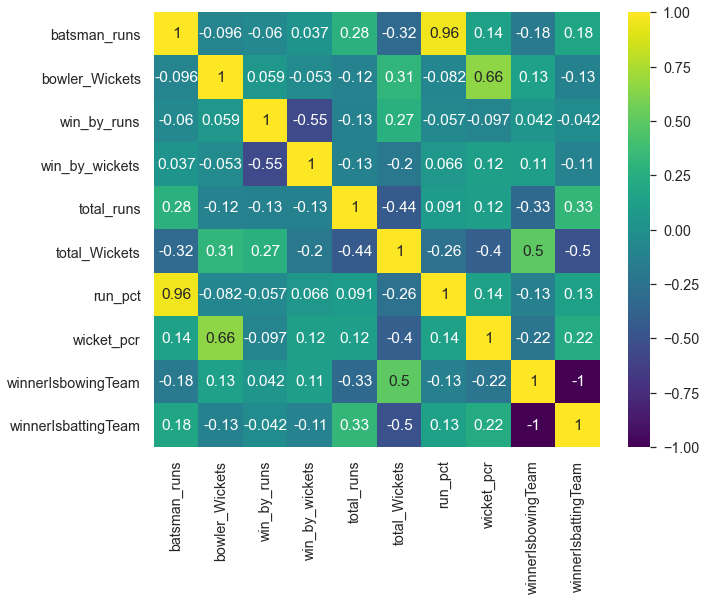

In [387]:
corr_mat = heatmap_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

# 5. Conclusion

      1.With the help of this Expliratory analysis different statistics of each performing player can be seen.
      2.Promotores of the new team "Aयोध्या Warriors" choose players in each category skills.
        Actionable Insights:
            By seeing different kind of statistics of plaeyrs in different skills 15-20 players can be choosen to select
            from datasets, as suggestedbelow.
            However further factor of age of players should be taken in cognizance when finalizing the probable team.
            So once promoters decide a list of probable team players we can get the age related data for those players
            to have final list. 
                1	 MS Dhoni(WK,Fielder,batsman)
                2	 Gilcrist(WK,Fielder)
                3	 KD Karthik(WK,Fielder)
                4	 AB de Villiers(Fielder,Batsman)
                5	 B Kumar(bowler)
                6	 Bumbrah (Bowler)
                7	 AJ Tye(Bowler)
                8	 Rashid Khan(Bowler)
                9	 Dj Bravo (Bowler)
                10	 H Panda  (All Rounder)
                11   KA Pollar (All Rounder)
                12	 Watson(All Rounder)
                13	 V Kohli( Batsman)
                14	 DA warner (Batsman)
                15	 KL Rahul(Batsman,hitter)
                16	 Gayle(Batsman,hitter)
                17	 Rishab Pant(hitter)
                18	 KS Williamson(hitter)
               
           We have provided list of 18 players as there may be chance of some players not playing or getting retainded by              their teams. So promoters should target getting 11 form these players and reat 4 from local talent pools for                sqad of 15 players